In [5]:
import pandas as pd
import numpy as np 
import pickle
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy import stats
import matplotlib.pyplot as plt
#from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.tree import export_graphviz, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from numpy.linalg import svd
import seaborn as sns




plt.style.use('ggplot')



In [83]:
data = pd.read_json('data/data.json')

In [84]:
data.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state'],
      dtype='object')

In [85]:
data.tail()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
14332,fraudster_event,1361689200,667,0,US,USD,0.0,<p>Celebrates this wonderful holiday with the ...,yahoo.com,1360297993,...,"[{'event_id': 5456442, 'cost': 45.0, 'availabi...",0,1360297993,1,6100 North Charles Street,US,39.373780,-76.629921,Elkridge Club,MD
14333,premium,1365566400,5812,5,US,USD,1.0,"<table style=""width: 600px;"" border=""0"" cellsp...",me.com,1360367042,...,"[{'event_id': 5465112, 'cost': 90.0, 'availabi...",1374,1241625346,4,1775 E Mission Bay Dr,US,32.778906,-117.209791,Hilton San Diego Resort and Spa (Hilton Missio...,CA
14334,premium,1368781200,557,13,,USD,0.0,<p>What a way to start off your Mother's Day l...,yahoo.com,1360600330,...,"[{'event_id': 5465732, 'cost': 20.0, 'availabi...",84,1353386971,4,5991 Bullard Road,US,30.041819,-89.957130,Fleur De Lis Ballroom NUMBER 2,LA
14335,tos_warn,1361361600,10873,8,US,USD,0.0,"<p style=""font-family: 'Helvetica Neue', Helve...",velvetlist.com,1360376285,...,"[{'event_id': 5465810, 'cost': 79.33, 'availab...",812,1290204991,3,2297 Cedar Ave,US,40.862283,-73.911363,Salsa con fuego,NY
14336,fraudster_event,1363316400,0,0,GB,GBP,0.0,,gmail.com,1360686846,...,"[{'event_id': 5492990, 'cost': 283.0, 'availab...",0,1360686845,1,192 Pembroke Street,GB,51.460131,-2.586503,massage salon private house,"Bristol, City Of"


In [86]:
data.groupby('acct_type').count()

,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
acct_type,,,,,,,,,,,,,,,,,,,,,
fraudster,437,437,437,437,437,425,437,437,437,437,...,437,437,437,437,437,330,330,330,330,330
fraudster_att,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,4,4,4,4,4
fraudster_event,851,851,851,851,851,851,851,851,851,851,...,851,851,851,851,851,589,589,589,589,589
locked,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,51,51,51,51,51
premium,12373,12373,12373,12297,12373,12369,12373,12373,12373,12373,...,12373,12373,12373,12373,12373,11700,11700,11700,11700,11700
spammer,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
spammer_limited,218,218,218,214,218,218,218,218,218,218,...,218,218,218,218,218,204,204,204,204,204
spammer_noinvite,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,82,82,82,82,82
spammer_warn,144,144,144,143,144,144,144,144,144,144,...,144,144,144,144,144,140,140,140,140,140


In [87]:
#Add fraud column

data['fraud']= data['acct_type'].str.contains('fraud')

In [88]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

In [89]:
data['fraud'].value_counts()

False    13044
True      1293
Name: fraud, dtype: int64

In [94]:
#Dave is going to break out this category

data['ticket_types'][0]

[{'event_id': 493362,
  'cost': 30.0,
  'availability': 1,
  'quantity_total': 240,
  'quantity_sold': 12},
 {'event_id': 493362,
  'cost': 10.0,
  'availability': 1,
  'quantity_total': 240,
  'quantity_sold': 11}]

In [52]:

python

In [32]:
from pandas_profiling import ProfileReport

In [34]:
profile = ProfileReport(data, explorative = True)

profile.to_file("fraud_cs.html")

In [95]:
data.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,True
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,False
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,False
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,889,1283870102,3,,None,NaN,NaN,None,None,False
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,False


In [96]:
tickets = pd.read_csv('data/ticket_types.csv')

In [97]:
new_df = pd.concat([data, tickets], axis=1, sort=False)

In [98]:
new_df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,venue_latitude,venue_longitude,venue_name,venue_state,fraud,event_id,cost,availability,quantity_total,quantity_sold
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,25.777471,-80.133433,INK Nightclub - South Beach,FL,True,527017.0,625.00,3.0,920.0,0
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,32.776566,-79.930922,"The Charleston, SC area",SC,False,786878.0,70.00,2.0,100.0,25
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,33.944201,-118.080419,Los Angeles County Office of Education,CA,False,787337.0,93.51,1.0,48.0,48
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,NaN,NaN,None,None,False,885645.0,82.00,6.0,30000.0,58
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,42.353848,-71.044276,Fish & Richardson,MA,False,1114349.0,814.00,8.0,264.0,39


In [99]:
new_df['ticket_types']

0        [{'event_id': 527017, 'cost': 25.0, 'availabil...
1        [{'event_id': 786878, 'cost': 35.0, 'availabil...
2        [{'event_id': 787337, 'cost': 93.51, 'availabi...
3        [{'event_id': 885645, 'cost': 25.0, 'availabil...
4        [{'event_id': 1114349, 'cost': 150.0, 'availab...
                               ...                        
14332    [{'event_id': 5456442, 'cost': 45.0, 'availabi...
14333    [{'event_id': 5465112, 'cost': 90.0, 'availabi...
14334    [{'event_id': 5465732, 'cost': 20.0, 'availabi...
14335    [{'event_id': 5465810, 'cost': 79.33, 'availab...
14336    [{'event_id': 5492990, 'cost': 283.0, 'availab...
Name: ticket_types, Length: 14337, dtype: object

In [47]:
'acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state' 
    
   #tickets_df[""] = tickets_df[""].fillna('0').replace('','0')
    
    
    #data.previous_payouts = [len(i) for i in data.previous_payouts]

8

In [100]:
drop_list = ['acct_type', 'body_length', 'channels', 'delivery_method', 'description',
'email_domain', 'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo', 'object_id',
'org_desc', 'org_facebook', 'org_name', 'org_twitter','payee_name','ticket_types', 'ticket_types',
            'user_created', 'user_type','venue_country',
       'venue_latitude', 'venue_longitude',  'venue_state']


In [102]:
new_df.drop(['acct_type', 'body_length', 'channels', 'delivery_method', 'description','email_domain', 'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo', 'object_id','org_desc', 'org_facebook', 'org_name', 'org_twitter','payee_name','ticket_types', 'ticket_types',
            'user_created', 'user_type','venue_country','venue_latitude', 'venue_longitude',  'venue_state'], axis=1, inplace =True)


In [103]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   approx_payout_date  14337 non-null  int64  
 1   country             14256 non-null  object 
 2   currency            14337 non-null  object 
 3   event_created       14337 non-null  int64  
 4   event_end           14337 non-null  int64  
 5   event_published     14238 non-null  float64
 6   event_start         14337 non-null  int64  
 7   listed              14337 non-null  object 
 8   name                14337 non-null  object 
 9   name_length         14337 non-null  int64  
 10  num_order           14337 non-null  int64  
 11  num_payouts         14337 non-null  int64  
 12  payout_type         14337 non-null  object 
 13  previous_payouts    14337 non-null  object 
 14  sale_duration       14182 non-null  float64
 15  sale_duration2      14337 non-null  int64  
 16  show

In [105]:
new_df['previous_payouts'] = [len(i) for i in data['previous_payouts']]

In [106]:
new_df['previous_payouts']

0          0
1         49
2         36
3         21
4         49
        ... 
14332      0
14333      5
14334      1
14335    128
14336      0
Name: previous_payouts, Length: 14337, dtype: int64

In [108]:
new_df['payout_type'].value_counts()

ACH      10666
CHECK     3178
           493
Name: payout_type, dtype: int64

In [110]:
new_df.drop(['listed', 'name', 'name_length', 'event_created', 'event_end', 'event_published', 'event_start'], axis = 1, inplace =True)

In [111]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   approx_payout_date  14337 non-null  int64  
 1   country             14256 non-null  object 
 2   currency            14337 non-null  object 
 3   num_order           14337 non-null  int64  
 4   num_payouts         14337 non-null  int64  
 5   payout_type         14337 non-null  object 
 6   previous_payouts    14337 non-null  int64  
 7   sale_duration       14182 non-null  float64
 8   sale_duration2      14337 non-null  int64  
 9   show_map            14337 non-null  int64  
 10  user_age            14337 non-null  int64  
 11  venue_address       14337 non-null  object 
 12  venue_name          13261 non-null  object 
 13  fraud               14337 non-null  bool   
 14  event_id            14249 non-null  float64
 15  cost                13839 non-null  float64
 16  avai

In [112]:
new_df.to_csv('reduced_df.csv', index=False)

In [114]:
reduced_df = pd.read_csv('data/reduced_df.csv') 

In [115]:
reduced_df.head()

,approx_payout_date,country,currency,num_order,num_payouts,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,user_age,venue_address,venue_name,fraud,event_id,cost,availability,quantity_total,quantity_sold
0,1266062400,US,USD,0,0,NaN,0,29.0,33,1,36,717 Washington Avenue,INK Nightclub - South Beach,True,527017.0,625.00,3.0,920.0,0
1,1296720000,US,USD,23,1,CHECK,49,28.0,28,0,149,NaN,"The Charleston, SC area",False,786878.0,70.00,2.0,100.0,25
2,1296172800,US,USD,19,4,CHECK,36,54.0,54,0,214,10100 Pioneer Blvd Suite 100,Los Angeles County Office of Education,False,787337.0,93.51,1.0,48.0,48
3,1388966400,IE,EUR,39,16,ACH,21,0.0,0,0,889,NaN,NaN,False,885645.0,82.00,6.0,30000.0,58
4,1297900800,US,USD,30,0,CHECK,49,63.0,63,0,35,One Marina Park Drive,Fish & Richardson,False,1114349.0,814.00,8.0,264.0,39


In [116]:
# fraud column to ones and zeros

reduced_df["fraud"] = reduced_df["fraud"].astype(int)

In [119]:
reduced_df.shape

(14337, 19)

In [124]:
reduced_df['cost']

array([ 625.  ,   70.  ,   93.51, ...,  649.65, 1107.17,  346.  ])

In [ ]:
#more to drop.  

event_id, venue_address

In [128]:
#Categorical w/NAN
reduced_df['country'] = reduced_df['country'].fillna('NoName')
reduced_df['venue_name'] = reduced_df['venue_name'].fillna('NoName')
reduced_df['payout_type'] = reduced_df['payout_type'].fillna('Unknown')



#Continuous w/ NAN
reduced_df['sale_duration'] = reduced_df['sale_duration'].fillna(0)
reduced_df['availability'] = reduced_df['availability'].fillna(0)
reduced_df['cost'] = reduced_df['cost'].fillna(0)
reduced_df['event_id'] = reduced_df['event_id'].fillna('NoId')

In [129]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   approx_payout_date  14337 non-null  int64  
 1   country             14337 non-null  object 
 2   currency            14337 non-null  object 
 3   num_order           14337 non-null  int64  
 4   num_payouts         14337 non-null  int64  
 5   payout_type         14337 non-null  object 
 6   previous_payouts    14337 non-null  int64  
 7   sale_duration       14337 non-null  float64
 8   sale_duration2      14337 non-null  int64  
 9   show_map            14337 non-null  int64  
 10  user_age            14337 non-null  int64  
 11  venue_address       12166 non-null  object 
 12  venue_name          14337 non-null  object 
 13  fraud               14337 non-null  int64  
 14  event_id            14337 non-null  object 
 15  cost                14337 non-null  float64
 16  avai

In [131]:
reduced_df.drop(['event_id', 'venue_address'], axis =1, inplace = True)

In [132]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   approx_payout_date  14337 non-null  int64  
 1   country             14337 non-null  object 
 2   currency            14337 non-null  object 
 3   num_order           14337 non-null  int64  
 4   num_payouts         14337 non-null  int64  
 5   payout_type         14337 non-null  object 
 6   previous_payouts    14337 non-null  int64  
 7   sale_duration       14337 non-null  float64
 8   sale_duration2      14337 non-null  int64  
 9   show_map            14337 non-null  int64  
 10  user_age            14337 non-null  int64  
 11  venue_name          14337 non-null  object 
 12  fraud               14337 non-null  int64  
 13  cost                14337 non-null  float64
 14  availability        14337 non-null  float64
 15  quantity_total      14337 non-null  float64
 16  quan

In [136]:
2+2

4

In [137]:
reduced_df['venue_name'] = reduced_df['venue_name'] == 'NoName'
reduced_df['venue_name'] = reduced_df['venue_name'].astype(int)

In [138]:
reduced_df.shape

(14337, 17)

In [140]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   approx_payout_date  14337 non-null  int64  
 1   country             14337 non-null  object 
 2   currency            14337 non-null  object 
 3   num_order           14337 non-null  int64  
 4   num_payouts         14337 non-null  int64  
 5   payout_type         14337 non-null  object 
 6   previous_payouts    14337 non-null  int64  
 7   sale_duration       14337 non-null  float64
 8   sale_duration2      14337 non-null  int64  
 9   show_map            14337 non-null  int64  
 10  user_age            14337 non-null  int64  
 11  venue_name          14337 non-null  int64  
 12  fraud               14337 non-null  int64  
 13  cost                14337 non-null  float64
 14  availability        14337 non-null  float64
 15  quantity_total      14337 non-null  float64
 16  quan

In [143]:
currency = reduced_df.currency
currency_df = pd.get_dummies(currency)
payout = reduced_df.payout_type
payout_df = pd.get_dummies(payout)
country = reduced_df.country
country_df = pd.get_dummies(country)

In [144]:
df1 = pd.concat([reduced_df, currency_df, payout_df, country_df], axis=1, sort=False)

In [145]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 98 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   approx_payout_date  14337 non-null  int64  
 1   country             14337 non-null  object 
 2   currency            14337 non-null  object 
 3   num_order           14337 non-null  int64  
 4   num_payouts         14337 non-null  int64  
 5   payout_type         14337 non-null  object 
 6   previous_payouts    14337 non-null  int64  
 7   sale_duration       14337 non-null  float64
 8   sale_duration2      14337 non-null  int64  
 9   show_map            14337 non-null  int64  
 10  user_age            14337 non-null  int64  
 11  venue_name          14337 non-null  int64  
 12  fraud               14337 non-null  int64  
 13  cost                14337 non-null  float64
 14  availability        14337 non-null  float64
 15  quantity_total      14337 non-null  float64
 16  quan

In [146]:
df1.drop(['country', 'currency', 'payout_type'], axis=1, inplace=True)

In [147]:
df1.shape

(14337, 95)

In [148]:
df1['fraud'].value_counts()   # 10:1 imbalance class

0    13044
1     1293
Name: fraud, dtype: int64

In [ ]:
#EDA on final df

In [ ]:
#sns.histplot(ratings['rating'], bins = 10); 

In [150]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [163]:
y = df1['fraud']
X = df1.drop('fraud', axis=1)


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)  

In [165]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [183]:
y_test.shape

(2868,)

In [168]:
Counter(y_train)

Counter({1: 10435, 0: 10435})

In [169]:
Counter(y_test)

Counter({0: 2609, 1: 259})

In [177]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
score

0.8929567642956764

In [178]:
confusion_matrix(y_test, predictions)


array([[2556,   53],
       [ 254,    5]])

In [179]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2609
           1       0.09      0.02      0.03       259

    accuracy                           0.89      2868
   macro avg       0.50      0.50      0.49      2868
weighted avg       0.84      0.89      0.86      2868

[[2556   53]
 [ 254    5]]


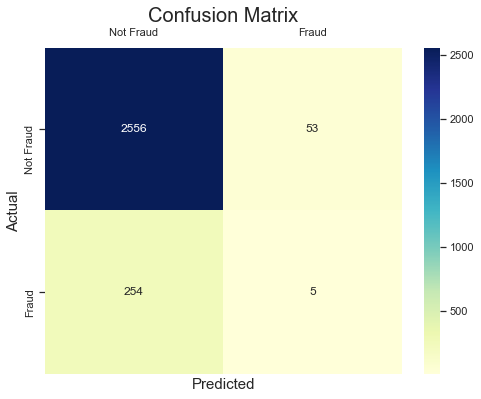

In [180]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
categories=['Not Fraud','Fraud']
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', xticklabels=categories, yticklabels=categories, ax=ax,cmap="YlGnBu")
ax.set_title('Confusion Matrix', fontsize=20)
ax.set_xlabel('Predicted',fontsize=15)
ax.set_ylabel('Actual',fontsize=15)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
#plt.savefig('rap_r&_heatmap.png')

In [181]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = rf.score(X_test, y_test)
score

0.9881450488145049

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2609
           1       0.93      0.94      0.93       259

    accuracy                           0.99      2868
   macro avg       0.96      0.97      0.96      2868
weighted avg       0.99      0.99      0.99      2868

[[2590   19]
 [  15  244]]


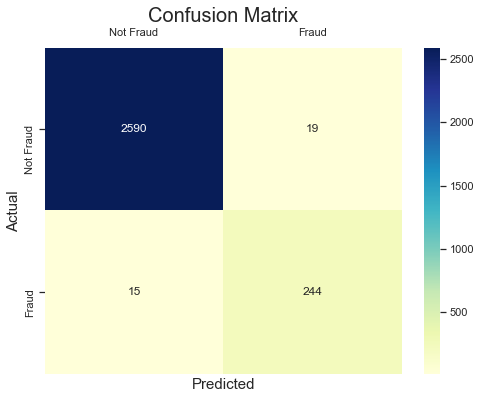

In [182]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
categories=['Not Fraud','Fraud']
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', xticklabels=categories, yticklabels=categories, ax=ax,cmap="YlGnBu")
ax.set_title('Confusion Matrix', fontsize=20)
ax.set_xlabel('Predicted',fontsize=15)
ax.set_ylabel('Actual',fontsize=15)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
#plt.savefig('rap_r&_heatmap.png')

In [184]:
pickle.dump(logisticRegr, open('logisticRegr.pkl','wb'))


In [186]:
probs = rf.predict_proba(X_test)
probs

array([[0.94, 0.06],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [0.9 , 0.1 ],
       [0.98, 0.02]])

In [187]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Feature ranking:
1. feature 3 (0.208375)
2. feature 12 (0.159659)
3. feature 4 (0.097613)
4. feature 5 (0.094348)
5. feature 7 (0.062781)
6. feature 2 (0.062428)
7. feature 1 (0.043188)
8. feature 0 (0.042037)
9. feature 21 (0.032686)
10. feature 9 (0.030873)
11. feature 10 (0.030263)
12. feature 20 (0.026984)
13. feature 88 (0.022245)
14. feature 11 (0.016997)
15. feature 6 (0.016426)
16. feature 22 (0.010001)
17. feature 19 (0.008452)
18. feature 14 (0.007313)
19. feature 32 (0.006598)
20. feature 27 (0.003617)
21. feature 13 (0.003557)
22. feature 47 (0.003373)
23. feature 16 (0.003183)
24. feature 8 (0.002652)
25. feature 71 (0.001651)
26. feature 15 (0.000795)
27. feature 46 (0.000166)
28. feature 25 (0.000156)
29. feature 18 (0.000152)
30. feature 64 (0.000118)
31. feature 53 (0.000105)
32. feature 70 (0.000103)
33. feature 75 (0.000096)
34. feature 44 (0.000092)
35. feature 29 (0.000081)
36. feature 92 (0.000078)
37. feature 69 (0.000065)
38. feature 83 (0.000062)
39. feature 24

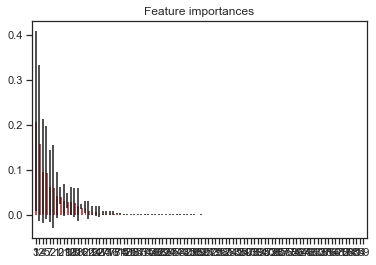

In [191]:
importances =rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()

In [192]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2868 entries, 10323 to 738
Data columns (total 94 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   approx_payout_date  2868 non-null   int64  
 1   num_order           2868 non-null   int64  
 2   num_payouts         2868 non-null   int64  
 3   previous_payouts    2868 non-null   int64  
 4   sale_duration       2868 non-null   float64
 5   sale_duration2      2868 non-null   int64  
 6   show_map            2868 non-null   int64  
 7   user_age            2868 non-null   int64  
 8   venue_name          2868 non-null   int64  
 9   cost                2868 non-null   float64
 10  availability        2868 non-null   float64
 11  quantity_total      2868 non-null   float64
 12  quantity_sold       2868 non-null   int64  
 13  AUD                 2868 non-null   uint8  
 14  CAD                 2868 non-null   uint8  
 15  EUR                 2868 non-null   uint8  
 16  GBP

In [194]:
y = df1['fraud']
X = df1[['previous_payouts', 'ticket_types']]


In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)  

In [198]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [199]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(y_pred = rf.predict(X_test))

score = rf.score(X_test, y_test)
score

0.9626917712691772

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2609
           1       0.75      0.88      0.81       259

    accuracy                           0.96      2868
   macro avg       0.87      0.92      0.89      2868
weighted avg       0.97      0.96      0.96      2868

[[2534   75]
 [  32  227]]


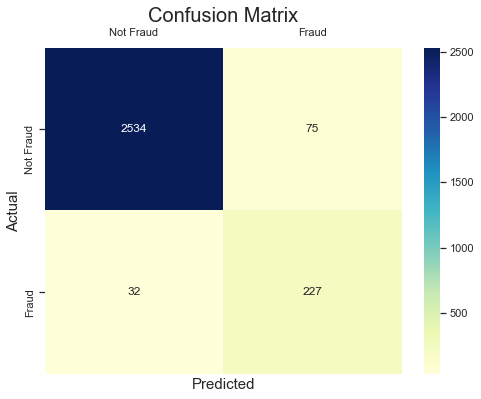

In [200]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
categories=['Not Fraud','Fraud']
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', xticklabels=categories, yticklabels=categories, ax=ax,cmap="YlGnBu")
ax.set_title('Confusion Matrix', fontsize=20)
ax.set_xlabel('Predicted',fontsize=15)
ax.set_ylabel('Actual',fontsize=15)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
#plt.savefig('rap_r&_heatmap.png')